<a href="https://colab.research.google.com/github/mvakhmenin/MindSet/blob/main/Mind_set_%D0%A0%D0%B5%D0%BA%D0%BE%D0%BC%D0%B5%D0%BD%D0%B4%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D1%8B_(%D0%B1%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B8_Implicit_%D0%B8_Light_FM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Доклад для стажировки в Mind-set по теме "Рекомендательные системы"</h1>

<h2>Введение</h2>
<p>Рекомендательные системы — алгоритмы, которые пытаются предсказать, какие объекты (например, фильмы, музыка, книги, новости, веб-сайты и т.п.) будут интересны пользователю, имея определенную информацию о его профиле.</p>
<p>Две основные стратегии создания рекомендательных систем — фильтрация на основе содержания и коллаборативная фильтрация. При фильтрации на основе содержания создаются профили пользователей и объектов. При коллаборативной фильтрации используются известные предпочтения (оценки) группы пользователей для прогнозирования неизвестных предпочтений другого пользователя. В этом случае не имеет значения, с какими типами объектов ведётся работа, но при этом могут учитываться неявные характеристики, которые сложно было бы учесть при создании профиля.</p>
<p>На практике используется гибридный метод построения рекомендаций, который включает в себя смесь вышеперечисленных методов. Коллаборативная фильтрация, в свою очередь, также разделяется на 3 основных подхода (типа):</p>

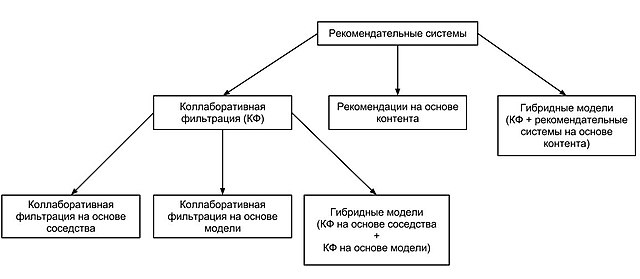

<h3>Проблемы рекомендательных систем</h3>

* Холодный старт - не понятно, что рекомендовать новому пользователю и кому рекомендовать новый объект
* Разреженность данных - малое количество пользователей провзаимодействовали с большим количеством объектов
* Debiasing - популярные объекты имеют смещенные оценки
* Short hHead, Long Tail - только небольшая часть объектов имеет большое количество взаимодействий
* Оценка качества моделей (оценка модели off-line, не все метрики off-line соответствуют метрикам AB-тестов)
* Объяснение рекомендация (модели машинного обучения часто сложно интерпретировать)
* Производительновсть в случае необходимости рекомендации в реальном времени






<h2>Эвристические методы</h2>
<h3>Кластеризация пользователей</h3>
<p>Для активного пользователя подбирается подгруппа пользователей схожих с ним. Комбинация весов и оценок подгруппы используется для прогноза оценок активного пользователя. У данного подхода можно выделить следующие основные шаги:</p>

* Присвоить вес каждому пользователю с учётом схожести его оценок и активного пользователя.
* Выбрать несколько пользователей, которые имеют максимальный вес, то есть максимально похожи на активного пользователя. Данная группа пользователей и называется соседями.
* Высчитать предсказание оценок активного пользователя для неоценённых им предметов с учётом весов и оценок соседей.

**<p>Проблемы:</p>**

* Холодный старт
* Не учитывается специфика конкретного пользователя
* Если в кластере никто не оценил объект, то предсказание сделать не получится

<h3>User-based подход</h3>
<p>Можно грубо оценить оценку пользователя, как среднюю по его оценкам. Взять оценки других пользователей по данному объекту и скорректировать оценку пользователя исходя из степени похожести пользователей</p>

**<p>Проблемы:</p>**

* Холодный старт

<h3>Item-based подход</h3>
<p>Аналогично User-based, но относительно объекта</p>


<h2>Матричные разложения (SVD: Singular Value Decomposition)</h2>

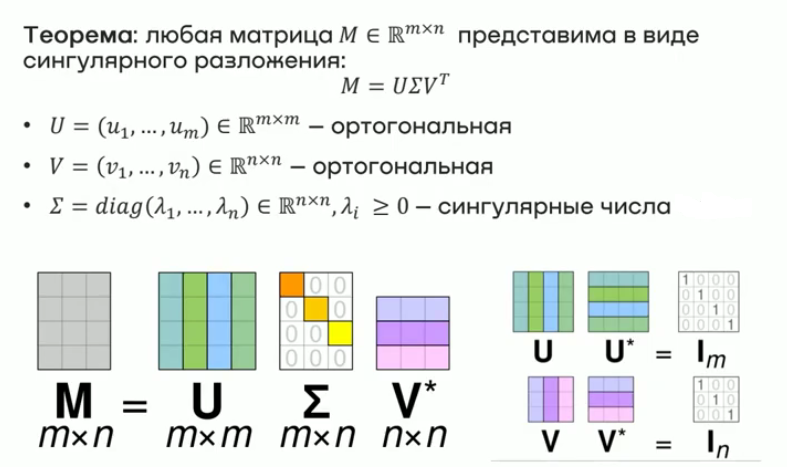

<p>Можно обрезать часть столбцов у матрицы U и часть строк у матриц E и V. Произведение "обрезанных" матриц будет приближением нашей оригинальной матрицы (мало ранговая апроксимация SVD).</p>
<p>Оценки пользователей предсказываеются через скалярное произведение латентных векторов пользователя и объекта.</p>

<h2>Типы оценок</h2>
<p>Explicit feedback - пользователь явным образом выразил свое отношение к объекту, поставил оценку (например, от 1 до 5). Можно судить об отношении пользователя к объекту.</p>
<p>Implicit feedback - пользователь явным образом не выразил свое отношение к объекту. Зафиксирован только факт взаимодейтсвия пользователя с объектом (1) или остуствие такого взаимодействия (0). В случае наличия взаимодейтсвия (1) нельзя утверждать, что объект понравился пользователю. Отсутствие взаимодейтсвия не свидетельствует о том, что объект пользователю не понравился.</p>
<p>Объем накопленных данных implicit feedback значительно превышает explicit feedback</p>

<h2>Метрики:</h2>

* Precision - доля объектов в списке рекомендаций, которые пользователю понравились, по отношению к общему количеству объектов в списке рекомендаций
* Recall - доля объектов в списке рекомендаций, которые пользователю понравились, по отношению к общему количеству объектов, которые понравлись пользователю
* MAP	(Mean average precision) - среднее значение Average precision по нескольким запросам (Для расчета Average precision расчитываются Precision и Recall по каждой позиции списка рекомендаций, строится функция p(r), и вычисляется площадь под кривой).
* NDCG (Normalized Discounted Cumulative Gain) - степень соотвествия списка рекомендаций, запросу пользователя (как в поисковых системах) с учетом порядка объектов в списке рекомендаций (более соответствующие объекты должны находиться выше в списке)
* AUC - площадь, ограниченная ROC-кривой. Позволяет оценить качество бинарной классификации, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак, и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак. Показывает количество объектов, которые понравились пользователю в списке рекомендаций.

<h2>Примеры библиотек рекомендательных систем:</h2>

* Implicit (https://github.com/benfred/implicit)
* Light FM (https://github.com/lyst/lightfm)
* Spotlight (https://github.com/maciejkula/spotlight)
* Surprise (https://github.com/NicolasHug/Surprise)
* OpenRec (https://github.com/ylongqi/openrec)

Ниже рассмотрим работу с библиотеками Implicit и Light FM на датасете <a href='https://grouplens.org/datasets/movielens'>MovieLens 1M</a>

In [ ]:
import sys
!{sys.executable} -m pip install implicit


     |████████████████████████████████| 1.1 MB 7.1 MB/s 
  Created wheel for implicit: filename=implicit-0.4.4-cp37-cp37m-linux_x86_64.whl size=3406556 sha256=dbd7fdafa9fc3da258e7d6bcbf4a8d389499510dc3dd986151cfdbbb9e0e2a15
  Stored in directory: /root/.cache/pip/wheels/44/7e/7d/a17324ea207cfbe76aca878b5b8ca0aa932cf55d163329be37
Successfully built implicit


In [ ]:
import numpy as np
import pandas as pd

import implicit
from implicit.datasets.movielens import get_movielens
titles, ratings = get_movielens('1m')
ratings # Всего 1 000 209 оценок от 3953 пользователей по 6041 фильму

<3953x6041 sparse matrix of type '<class 'numpy.float32'>'
	with 1000209 stored elements in Compressed Sparse Row format>

In [ ]:
# Матрица с оценками пользователей представляет собой Saprse matrix
# В каждой строке указан идентификатор фильма, идентификатор пользователя, оценка, выставленная фильму данным пользователем
print(type(ratings))
print(ratings)

<class 'scipy.sparse.csr.csr_matrix'>
  (1, 1)	5.0
  (1, 6)	4.0
  (1, 8)	4.0
  (1, 9)	5.0
  (1, 10)	5.0
  (1, 18)	4.0
  (1, 19)	5.0
  (1, 21)	3.0
  (1, 23)	4.0
  (1, 26)	3.0
  (1, 28)	3.0
  (1, 34)	5.0
  (1, 36)	5.0
  (1, 38)	5.0
  (1, 44)	5.0
  (1, 45)	4.0
  (1, 48)	4.0
  (1, 49)	5.0
  (1, 51)	5.0
  (1, 56)	5.0
  (1, 60)	4.0
  (1, 65)	5.0
  (1, 68)	3.0
  (1, 73)	3.0
  (1, 75)	5.0
  :	:
  (3952, 4790)	3.0
  (3952, 4802)	5.0
  (3952, 4816)	4.0
  (3952, 4823)	3.0
  (3952, 4831)	4.0
  (3952, 4834)	4.0
  (3952, 4858)	4.0
  (3952, 4939)	3.0
  (3952, 5049)	4.0
  (3952, 5074)	4.0
  (3952, 5087)	4.0
  (3952, 5100)	4.0
  (3952, 5205)	4.0
  (3952, 5304)	4.0
  (3952, 5333)	4.0
  (3952, 5359)	5.0
  (3952, 5405)	4.0
  (3952, 5475)	5.0
  (3952, 5602)	3.0
  (3952, 5682)	3.0
  (3952, 5812)	4.0
  (3952, 5831)	3.0
  (3952, 5837)	4.0
  (3952, 5927)	1.0
  (3952, 5998)	4.0


In [ ]:
print('Всего фильмов - ' + str(ratings.shape[0]))
print('Всего пользователей - ' + str(ratings.shape[1]))
print(ratings.todense())

Всего фильмов - 3953
Всего пользователей - 6041
[[0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 3.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Если перевести ее в Pandas DataFrame, то можно вывести в удобном виде
ratings_df = pd.DataFrame(ratings.toarray())
ratings_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6001,6002,6003,6004,6005,6006,6007,6008,6009,6010,6011,6012,6013,6014,6015,6016,6017,6018,6019,6020,6021,6022,6023,6024,6025,6026,6027,6028,6029,6030,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,3.0,0.0,4.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,5.0,0.0,5.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print('Отсутствующие оценки в матрице оценок пользователей - {:,}'.format((ratings_df==0.0).sum().sum()).replace(',', ' '))
print('Заполненные оценки в матрице оценок пользователей -  {:,}'.format((ratings_df!=0.0).sum().sum()).replace(',', ' '))
print('Матрица заполнена на {:.0%}'.format((ratings_df!=0.0).sum().sum()/(ratings_df.shape[0]*ratings_df.shape[1])))

Отсутствующие оценки в матрице оценок пользователей - 22 879 864
Заполненные оценки в матрице оценок пользователей -  1 000 209
Матрица заполнена на 4%


In [ ]:
# Список фильмов представляет собой numpy array байтовых строк
print(type(titles))
print(type(titles[0]))
print()
print('Длинна списка фильмов соответствует количеству фильмов в матрице с оценками пользователей - ' + str(len(titles)))
print()
# Выведем первые 10 фильмов в удобном виде
for t in titles[1:10]:
  print(t.decode('utf-8'))

<class 'numpy.ndarray'>
<class 'bytes'>

Длинна списка фильмов соответствует количеству фильмов в матрице с оценками пользователей - 3953

Toy Story (1995)
Jumanji (1995)
Grumpier Old Men (1995)
Waiting to Exhale (1995)
Father of the Bride Part II (1995)
Heat (1995)
Sabrina (1995)
Tom and Huck (1995)
Sudden Death (1995)


In [ ]:
# делим матрицу с оценками пользователей на train и test
from implicit.evaluation import train_test_split
train_ratings, test_ratings = train_test_split(ratings, 0.8)

In [ ]:
# метрики
from implicit.evaluation import ranking_metrics_at_k
K = 10 # выбирает топ-10 рекомендаций
FACTORS = 32 # размерность латентного вектора
n_iter = 100 # количество итераций при обучении модели

<h2>Расчет моделей из библиотеки Implicit</h2>
<h3>Alternating Least Squares</h3>
описание модели:
<a href='http://yifanhu.net/PUB/cf.pdf'>Collaborative Filtering for Implicit Feedback Datasets</a> c оптимизациями по <a href='https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.379.6473&rep=rep1&type=pdf'>Applications of the Conjugate Gradient Method for Implicit Feedback Collaborative Filtering</a>


In [ ]:
from scipy.sparse.linalg import svds # SVD разложение sparse-матрицы
from implicit.als import AlternatingLeastSquares

# Тренируем модель, считаем метрики
als = AlternatingLeastSquares(factors=FACTORS, iterations=100, random_state=0)
als.fit(train_ratings)
als_res = ranking_metrics_at_k(als, train_ratings.T, test_ratings.T, K)

# Записываем результат
res_index = []
res_index.append('Implicit ALS')
results = pd.DataFrame(als_res, index=res_index)
results

,precision,map,ndcg,auc
Implicit ALS,0.401218,0.265863,0.400564,0.582301


<h3>Bayesian Personal Ranking</h3>
описание модели:
<a href='https://arxiv.org/ftp/arxiv/papers/1205/1205.2618.pdf'> BPR: Bayesian Personalized Ranking from Implicit Feedback</a>

In [ ]:
from implicit.bpr import BayesianPersonalizedRanking

# Тренируем модель, считаем метрики
bpr = BayesianPersonalizedRanking(factors=FACTORS, iterations=100, random_state=0)
bpr.fit(train_ratings)
bpr_res = ranking_metrics_at_k(bpr, train_ratings.T, test_ratings.T, K)

# Записываем результат
res_index = []
res_index.append('Implicit BPR')
results = results.append(pd.DataFrame(bpr_res, index=res_index))
results

,precision,map,ndcg,auc
Implicit ALS,0.401218,0.265863,0.400564,0.582301
Implicit BPR,0.260671,0.147719,0.262848,0.554860


<h3>Logistic Matrix Factorization</h3>
описание модели: 
<a href='https://web.stanford.edu/~rezab/nips2014workshop/submits/logmat.pdf'>Logistic Matrix Factorization for Implicit Feedback Data</a>

In [ ]:
from implicit.lmf import LogisticMatrixFactorization

# Тренируем модель, считаем метрики
lmf = LogisticMatrixFactorization(factors=FACTORS, iterations=100, random_state=0)
lmf.fit(train_ratings)
lmf_res = ranking_metrics_at_k(lmf, train_ratings.T, test_ratings.T, K)

# Записываем результат
res_index = []
res_index.append('Implicit LMF')
results = results.append(pd.DataFrame(lmf_res, index=res_index))
results

100%|██████████| 100/100 [00:18<00:00,  5.44it/s]


,precision,map,ndcg,auc
Implicit ALS,0.401218,0.265863,0.400564,0.582301
Implicit BPR,0.260671,0.147719,0.262848,0.554860
Implicit LMF,0.238731,0.126841,0.229627,0.544606


<h2>Выдача рекомендаций по самой точной модели</h2>

In [ ]:
# получаем рекомендации для пользователя №1000
userid = 1000
user_items = train_ratings.T.tocsr()
recommendations = als.recommend(userid, user_items)
for movie, score in recommendations:
  print('{:.3f} : {}'.format(score, titles[movie].decode('utf-8')))

1.046 : Raiders of the Lost Ark (1981)
0.992 : Saving Private Ryan (1998)
0.940 : Fugitive, The (1993)
0.929 : Matrix, The (1999)
0.900 : Terminator, The (1984)
0.818 : Glory (1989)
0.815 : Alien (1979)
0.783 : Princess Bride, The (1987)
0.779 : Untouchables, The (1987)
0.777 : Lion King, The (1994)


In [ ]:
# Рекомендации включаю также объекты, с которыми пользователь взаимодействовал ранее
recommendations = als.recommend(userid, user_items, filter_already_liked_items=False)
for movie, score in recommendations:
  print('{:.3f} : {}'.format(score, titles[movie].decode('utf-8')))

1.096 : Star Wars: Episode V - The Empire Strikes Back (1980)
1.051 : Star Wars: Episode VI - Return of the Jedi (1983)
1.046 : Raiders of the Lost Ark (1981)
1.042 : Star Wars: Episode IV - A New Hope (1977)
1.004 : Die Hard (1988)
0.992 : Saving Private Ryan (1998)
0.940 : Fugitive, The (1993)
0.929 : Matrix, The (1999)
0.909 : Braveheart (1995)
0.901 : Terminator 2: Judgment Day (1991)


<h3>Вспомогательные методы библиотеки Implicit</h3>

In [ ]:
# получаем список схожих объектов для фильма №1 (Toy Story)
movieid = 1
als_sim = als.similar_items(movieid, K)
for movie, similarity in als_sim:
  print('{:.3f} : {}'.format(similarity, titles[movie].decode('utf-8')))

1.000 : Toy Story (1995)
0.814 : Toy Story 2 (1999)
0.800 : Babe (1995)
0.763 : Groundhog Day (1993)
0.693 : Aladdin (1992)
0.664 : Bug's Life, A (1998)
0.634 : There's Something About Mary (1998)
0.619 : Babe: Pig in the City (1998)
0.589 : Wrong Trousers, The (1993)
0.575 : Clueless (1995)


In [ ]:
# получаем список схожих пользователей для пользователя №1000
als_sim_users = als.similar_users(userid, K)
for user, similarity in als_sim_users:
  print('{:.3f} : пользователь №{}'.format(similarity, user))

1.000 : пользователь №1000
0.803 : пользователь №1871
0.798 : пользователь №539
0.795 : пользователь №1349
0.793 : пользователь №1093
0.789 : пользователь №994
0.787 : пользователь №5611
0.787 : пользователь №1938
0.786 : пользователь №3534
0.783 : пользователь №2377


In [ ]:
# ранжирум перечень объектов (№2, 20, 200, 2000) для пользователя №1000
selected_items = [2, 20, 200, 2000]
rank_items = train_ratings.T.tocsr()
items_ranks = als.rank_items(userid, user_items, selected_items)
for movie, score in items_ranks:
  print('{:.3f} : {}'.format(score, titles[movie].decode('utf-8')))

0.907 : Lethal Weapon (1987)
-0.004 : Tie That Binds, The (1995)
-0.020 : Money Train (1995)
-0.095 : Jumanji (1995)


<h2>Расчет моделей из библиотеки LightFM</h2>

In [ ]:
pip install lightfm

<h3>Традиционная модель Matrix Factorization</h3>

In [ ]:
from lightfm import LightFM
from lightfm.evaluation import precision_at_k, auc_score

lfm_model = LightFM(no_components=FACTORS, random_state=0)
lfm = lfm_model.fit(train_ratings.T.tocsr(), epochs=n_iter, verbose=True)

Epoch: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]


In [ ]:
# Считаем метрики
lfm_mf_res = {'auc': auc_score(lfm, test_ratings.T.tocsr(), train_ratings.T.tocsr()).mean(), 
              'map': '-', 
              'ndcg': '-', 
              'precision': precision_at_k(lfm, test_ratings.T.tocsr(), train_ratings.T.tocsr()).mean()
              }

# Записываем результат
res_index = []
res_index.append('LightFM MF')
results = results.append(pd.DataFrame(lfm_mf_res, index=res_index))
results

,precision,map,ndcg,auc
Implicit ALS,0.403084,0.268703,0.405366,0.583601
Implicit BPR,0.256708,0.143324,0.259118,0.554963
Implicit LMF,0.240821,0.12853,0.232998,0.546587
LightFM MF,0.179612,-,-,0.870812


<h3>BPR: Bayesian Personalised Ranking</h3>

In [ ]:
lfm_bpr_model = LightFM(no_components=FACTORS, loss='bpr', random_state=0)
lfm_bpr = lfm_bpr_model.fit(train_ratings.T.tocsr(), epochs=n_iter, verbose=True)

Epoch: 100%|██████████| 100/100 [02:16<00:00,  1.37s/it]


In [ ]:
# Считаем метрики
lfm_bpr_res = {'auc': auc_score(lfm_bpr, test_ratings.T.tocsr(), train_ratings.T.tocsr()).mean(), 
              'map': '-', 
              'ndcg': '-', 
              'precision': precision_at_k(lfm_bpr, test_ratings.T.tocsr(), train_ratings.T.tocsr()).mean()
              }

# Записываем результат
res_index = []
res_index.append('LightFM BPR')
results = results.append(pd.DataFrame(lfm_bpr_res, index=res_index))
results

,precision,map,ndcg,auc
Implicit ALS,0.403084,0.268703,0.405366,0.583601
Implicit BPR,0.256708,0.143324,0.259118,0.554963
Implicit LMF,0.240821,0.12853,0.232998,0.546587
LightFM MF,0.179612,-,-,0.870812
LightFM BPR,0.212813,-,-,0.877116


<h3>WARP: Weighted Approximate-Rank Pairwise</h3>
описание модели: <a href='http://www.thespermwhale.com/jaseweston/papers/wsabie-ijcai.pdf'>WSABIE: Scaling Up To Large Vocabulary Image Annotation</a>

In [ ]:
lfm_wrp_model = LightFM(no_components=FACTORS, loss='warp', random_state=0)
lfm_wrp = lfm_wrp_model.fit(train_ratings.T.tocsr(), epochs=n_iter, verbose=True)

Epoch: 100%|██████████| 100/100 [02:15<00:00,  1.36s/it]


In [ ]:
# Считаем метрики
lfm_wrp_res = {'auc': auc_score(lfm_wrp, test_ratings.T.tocsr(), train_ratings.T.tocsr()).mean(), 
              'map': '-', 
              'ndcg': '-', 
              'precision': precision_at_k(lfm_wrp, test_ratings.T.tocsr(), train_ratings.T.tocsr()).mean()
              }

# Записываем результат
res_index = []
res_index.append('LightFM WARP')
results = results.append(pd.DataFrame(lfm_wrp_res, index=res_index))
results

,precision,map,ndcg,auc
Implicit ALS,0.403084,0.268703,0.405366,0.583601
Implicit BPR,0.256708,0.143324,0.259118,0.554963
Implicit LMF,0.240821,0.12853,0.232998,0.546587
LightFM MF,0.179612,-,-,0.870812
LightFM BPR,0.212813,-,-,0.877116
LightFM WARP,0.335737,-,-,0.936491


<h3>k-OS WARP: k-th order statistic loss</h3>
описание модели: <a href='https://www.ee.columbia.edu/~ronw/pubs/recsys2013-kaos.pdf'>Learning to Rank Recommendations
with the k-Order Statistic Loss</a>

In [ ]:
lfm_wrp_kos_model = LightFM(no_components=FACTORS, loss='warp-kos', random_state=0)
lfm_wrp_kos = lfm_wrp_kos_model.fit(train_ratings.T.tocsr(), epochs=n_iter, verbose=True)

Epoch: 100%|██████████| 100/100 [03:49<00:00,  2.29s/it]


In [ ]:
# Считаем метрики
lfm_wrp_kos_res = {'auc': auc_score(lfm_wrp_kos, test_ratings.T.tocsr(), train_ratings.T.tocsr()).mean(), 
              'map': '-', 
              'ndcg': '-', 
              'precision': precision_at_k(lfm_wrp_kos, test_ratings.T.tocsr(), train_ratings.T.tocsr()).mean()
              }

# Записываем результат
res_index = []
res_index.append('LightFM WARP')
results = results.append(pd.DataFrame(lfm_wrp_kos_res, index=res_index))
results

,precision,map,ndcg,auc
Implicit ALS,0.403084,0.268703,0.405366,0.583601
Implicit BPR,0.256708,0.143324,0.259118,0.554963
Implicit LMF,0.240821,0.12853,0.232998,0.546587
LightFM MF,0.179612,-,-,0.870812
LightFM BPR,0.212813,-,-,0.877116
LightFM WARP,0.335737,-,-,0.936491
LightFM WARP,0.316377,-,-,0.919416


In [ ]:
# Предсказания для пользователя 1000 по самой точной модели Light FM
lfm_preds = lfm_wrp.predict(1000, list(range(ratings.shape[0])))

In [ ]:
lfm_preds_s = pd.Series(lfm_preds).sort_values(ascending=False).head(10)
for i in lfm_preds_s.index:
  print('{:.3f} : {}'.format(lfm_preds_s[i], titles[i].decode('utf-8')))

0.532 : Goldfinger (1964)
0.433 : Raiders of the Lost Ark (1981)
0.413 : Die Hard (1988)
0.240 : From Russia with Love (1963)
0.221 : Hunt for Red October, The (1990)
0.199 : Dr. No (1962)
0.139 : Fugitive, The (1993)
0.138 : Star Wars: Episode V - The Empire Strikes Back (1980)
0.089 : Terminator, The (1984)
0.008 : Bambi (1942)


In [ ]:
recomendations_df = pd.DataFrame()
recomendations_df['implicit'] = 

<h2>Список литературы</h2>

* <a href='https://habr.com/ru/company/lanit/blog/421401/'>Анатомия рекомендательных систем</a>
* <a href='https://habr.com/ru/company/jetinfosystems/blog/453792/'>Рекомендательные системы: идеи, подходы, задачи</a>
* <a href='https://en.wikipedia.org/wiki/Relevance_feedback'>Relevance feedback</a>
* <a href='https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%BA%D0%BE%D0%BC%D0%B5%D0%BD%D0%B4%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D0%B0'>Рекомендательная система</a>
* <a href='https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%B0%D1%8F_%D1%84%D0%B8%D0%BB%D1%8C%D1%82%D1%80%D0%B0%D1%86%D0%B8%D1%8F'>Коллаборативная фильтрация</a>
* <a href='https://link.springer.com/article/10.1007/s13042-017-0762-9'>How good your recommender system is? A survey on evaluations in recommendation</a>
* <a href='https://en.wikipedia.org/wiki/Evaluation_measures_(information_retrieval)'>Evaluation measures (information retrieval)</a>
* <a href='https://en.wikipedia.org/wiki/Discounted_cumulative_gain'>Discounted cumulative gain</a>
* <a href='https://arxiv.org/ftp/arxiv/papers/1205/1205.2618.pdf'> BPR: Bayesian Personalized Ranking from Implicit Feedback</a>
* <a href='http://yifanhu.net/PUB/cf.pdf'>Collaborative Filtering for Implicit Feedback Datasets</a>
* <a href='https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.379.6473&rep=rep1&type=pdf'>Applications of the Conjugate Gradient Method for Implicit Feedback Collaborative Filtering</a>
* <a href='https://web.stanford.edu/~rezab/nips2014workshop/submits/logmat.pdf'>Logistic Matrix Factorization for Implicit Feedback Data</a>